In [20]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import csv

In [39]:
# Change the stock symbol and date range
stock_symbol = 'AMD'
start_date = '2017-2-27'
end_date = '2018-4-19'

stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

print(stock_data.head())
stock_data.to_csv('data.csv')

[*********************100%%**********************]  1 of 1 completed

             Open   High    Low  Close  Adj Close     Volume
Date                                                        
2017-02-27  14.27  15.35  14.27  15.20      15.20   95422900
2017-02-28  15.45  15.55  14.35  14.46      14.46  141783000
2017-03-01  15.08  15.09  14.52  14.96      14.96   73450400
2017-03-02  14.59  14.78  13.87  13.90      13.90  104330900
2017-03-03  13.55  13.58  12.79  13.03      13.03  163395900


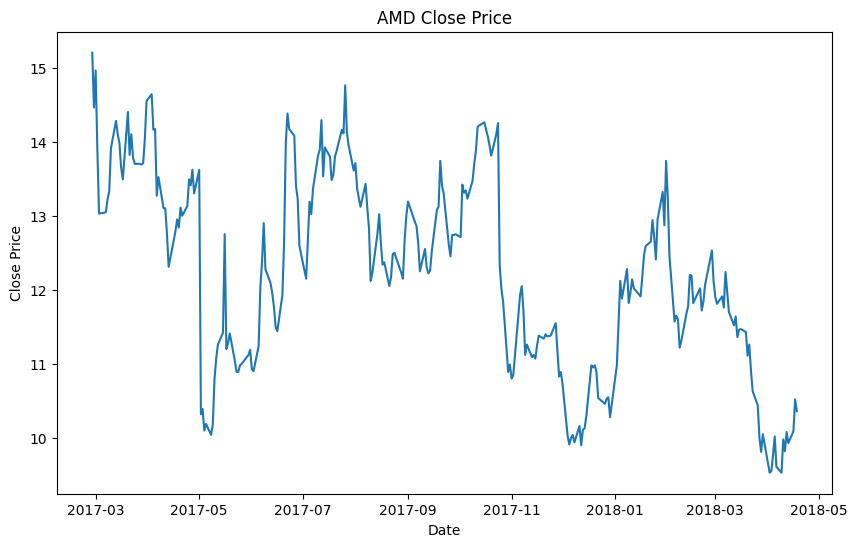

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Close'])
plt.title(f'{stock_symbol} Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.savefig(f'./mnt/data/train/{stock_symbol}_{start_date}_to_{end_date}.png')
plt.show()
# If pattern displayed is not anticpiated, delete the image in directory and rerun the script with different date
plt.close()

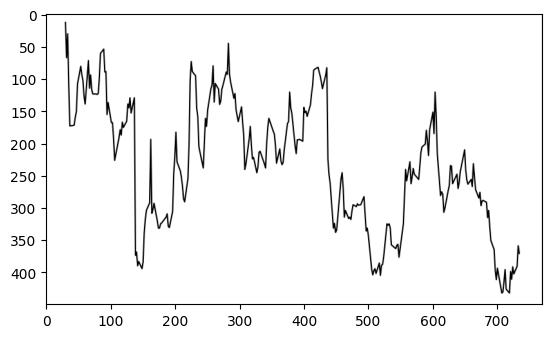

In [41]:
## IMAGE PREPROCESSING

# Load and process the image
image_path = f'./mnt/data/train/{stock_symbol}_{start_date}_to_{end_date}.png'
image = cv2.imread(image_path)

x_start, y_start = 130, 80 
x_end, y_end = 900, 530

# Crop the image
cropped_image = image[y_start:y_end, x_start:x_end]

# Convert the cropped image to grayscale
grayscale_image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)

# Save the grayscale image back to the original path
cv2.imwrite(image_path, grayscale_image)

# Display the grayscale image
plt.imshow(grayscale_image, cmap='gray')
plt.show()

# Path to the CSV file
csv_file_path = './mnt/data/labels.csv'

# Check if the CSV file exists; if not, create it and write the header
if not os.path.isfile(csv_file_path):
    with open(csv_file_path, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['filename', 'label'])

# Set the label for the image (False for non-impulse and True for impulse)
is_impulse = False 

# Append the new image data to the CSV file
with open(csv_file_path, mode='a', newline='') as file:
    writer = csv.writer(file)
    writer.writerow([os.path.basename(image_path), int(is_impulse)])
